In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('lena.bmp')

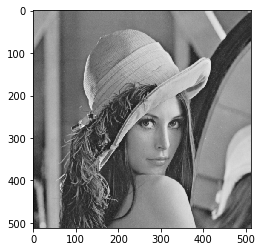

In [42]:
%matplotlib inline
plt.imshow(img)

In [3]:
pos=img.copy()

* create structuring element

In [4]:
#sturcturing element
struct_r=[-2, -2, -2, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]
struct_c=[-1, 0, 1, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -1, 0, 1]

#### Dilation --> find local maximum

In [5]:
#convert to 2d array since it's easier to compute
pos_2d=np.zeros((512, 512))
for i in range(pos.shape[0]):
    for j in range(pos.shape[1]):
        pos_2d[i,j]=pos[i,j,1]

In [20]:
dilation=np.zeros((512,512,3))
local_max=0

for i in range(pos_2d.shape[0]):
    for j in range(pos_2d.shape[1]):
        for r in range(len(struct_r)):
            if (0<=i+struct_r[r]<=511) and (0<=j+struct_c[r]<=511) and (pos_2d[i+struct_r[r],j+struct_c[r]]>local_max):
                local_max=pos_2d[i+struct_r[r],j+struct_c[r]]
        dilation[i,j]=local_max
        local_max=0
        
#convert dilation from float to int array
dilation=dilation.astype(int)

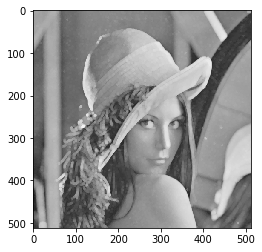

In [21]:
%matplotlib inline
plt.imshow(dilation)

In [22]:
def dilation(pos_2d,struct_r,struct_c):
    dilation=np.zeros((512,512,3))
    local_max=0

    for i in range(pos_2d.shape[0]):
        for j in range(pos_2d.shape[1]):
            for r in range(len(struct_r)):
                if (0<=i+struct_r[r]<=511) and (0<=j+struct_c[r]<=511) and (pos_2d[i+struct_r[r],j+struct_c[r]]>local_max):
                    local_max=pos_2d[i+struct_r[r],j+struct_c[r]]
            dilation[i,j]=local_max
            local_max=0

    #convert dilation from float to int array
    dilation=dilation.astype(int)
    
    return dilation

#### Erosion --> find local minimum

In [26]:
erosion=np.zeros((512,512,3))
local_min=255

for i in range(pos_2d.shape[0]):
    for j in range(pos_2d.shape[1]):
        for r in range(len(struct_r)):
            if (0<=i+struct_r[r]<=511) and (0<=j+struct_c[r]<=511) and (pos_2d[i+struct_r[r],j+struct_c[r]]<local_min):
                local_min=pos_2d[i+struct_r[r],j+struct_c[r]]
        erosion[i,j]=local_min
        local_min=255
        
#convert erosion from float to int array
erosion=erosion.astype(int)

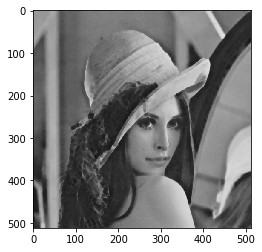

In [27]:
%matplotlib inline
plt.imshow(erosion)

In [31]:
def erosion(pos_2d,struct_r,struct_c):
    erosion=np.zeros((512,512,3))
    local_min=255

    for i in range(pos_2d.shape[0]):
        for j in range(pos_2d.shape[1]):
            for r in range(len(struct_r)):
                if (0<=i+struct_r[r]<=511) and (0<=j+struct_c[r]<=511) and (pos_2d[i+struct_r[r],j+struct_c[r]]<local_min):
                    local_min=pos_2d[i+struct_r[r],j+struct_c[r]]
            erosion[i,j]=local_min
            local_min=255

    #convert erosion from float to int array
    erosion=erosion.astype(int)
    
    return erosion

#### Opening --> erosion -> dilation

In [34]:
open1=erosion(pos_2d,struct_r,struct_c)

open1_pos=np.zeros((512, 512))  
for i in range(open1.shape[0]):
    for j in range(open1.shape[1]):
        open1_pos[i,j]=open1[i,j,1]
            
opening=dilation(open1_pos,struct_r,struct_c)

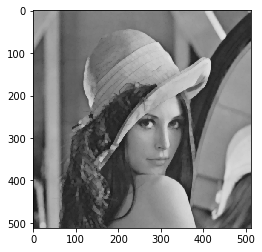

In [35]:
%matplotlib inline
plt.imshow(opening)

#### Closing --> dilation -> erosion

In [40]:
close1=dilation(pos_2d,struct_r,struct_c)

close1_pos=np.zeros((512, 512))  
for i in range(close1.shape[0]):
    for j in range(close1.shape[1]):
        close1_pos[i,j]=close1[i,j,1]
            
closing=erosion(close1_pos,struct_r,struct_c)

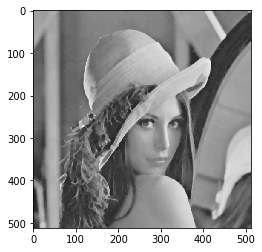

In [41]:
%matplotlib inline
plt.imshow(closing)